In [1]:
require(ISLR)

Loading required package: ISLR


In [3]:
names(Smarket)
summary(Smarket)
?Smarket

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

Smarket {ISLR},R Documentation


In [7]:
# I think this pairs plot takes up a ton of memory in my notebook, so I omit it here
#pairs(Smarket, col=Smarket$Direction)

[1] 26

In [8]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)

In [9]:
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [10]:
glm.probs=predict(glm.fit,type='response')

In [13]:
glm.pred = ifelse(glm.probs>0.5, 'Up', 'Down')

In [16]:
table(glm.pred, Smarket$Direction)

        
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [17]:
mean(glm.pred==Smarket$Direction)

[1] 0.5216

In [18]:
Train = Smarket$Year < 2005

In [37]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=Train)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket, subset = Train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.302  -1.190   1.079   1.160   1.350  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.191213   0.333690   0.573    0.567
Lag1        -0.054178   0.051785  -1.046    0.295
Lag2        -0.045805   0.051797  -0.884    0.377
Lag3         0.007200   0.051644   0.139    0.889
Lag4         0.006441   0.051706   0.125    0.901
Lag5        -0.004223   0.051138  -0.083    0.934
Volume      -0.116257   0.239618  -0.485    0.628

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.1  on 991  degrees of freedom
AIC: 1395.1

Number of Fisher Scoring iterations: 3


In [33]:
glm.probs=predict(glm.fit, newdata=Smarket[!Train,], type='response')

In [34]:
glm.pred = ifelse(glm.probs>0.5, 'Up', 'Down')

In [35]:
Direction.2005 = Smarket$Direction[!Train]

In [36]:
table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [25]:
mean(glm.pred==Direction.2005)

[1] 0.4801587

In [26]:
glm.fit = glm(Direction~Lag1 + Lag2, data=Smarket, family=binomial, subset=Train)

In [27]:
glm.probs=predict(glm.fit, newdata=Smarket[!Train,], type='response')

In [28]:
glm.pred = ifelse(glm.probs>0.5, 'Up', 'Down')

In [29]:
table(glm.pred,Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [30]:
mean(glm.pred==Direction.2005)

[1] 0.5595238

In [31]:
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Smarket, 
    subset = Train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.345  -1.188   1.074   1.164   1.326  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03222    0.06338   0.508    0.611
Lag1        -0.05562    0.05171  -1.076    0.282
Lag2        -0.04449    0.05166  -0.861    0.389

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 995  degrees of freedom
AIC: 1387.4

Number of Fisher Scoring iterations: 3


In [38]:
# Part 2
require(MASS) # has the linear discriminant analysis function

Loading required package: MASS


In [40]:
lda.fit = lda(Direction~Lag1+Lag2, data=Smarket, subset=Year<2005)

In [41]:
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

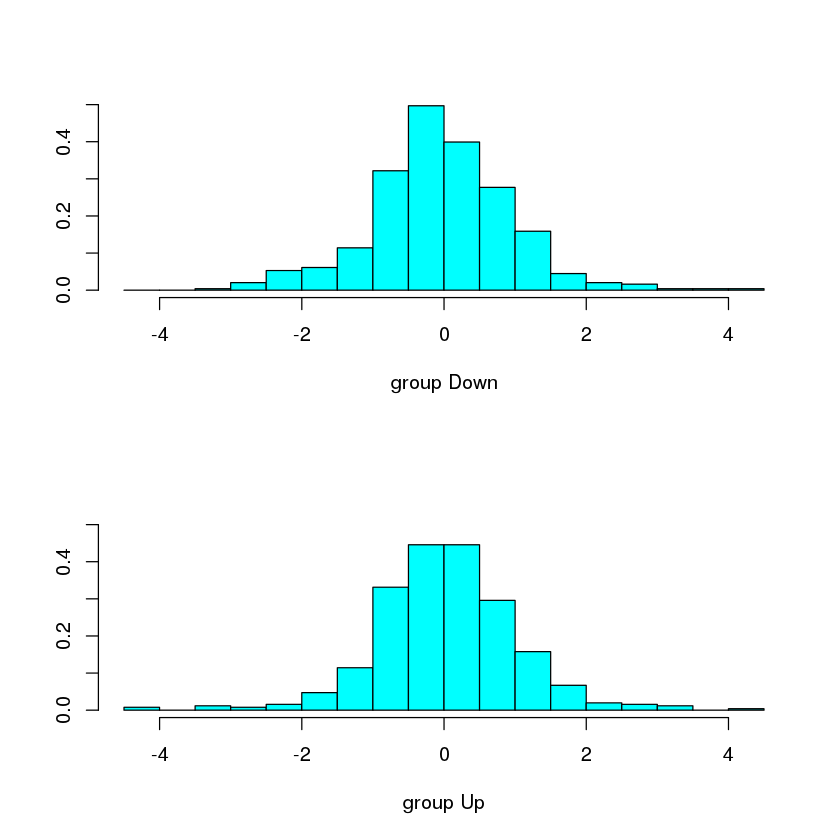

In [42]:
plot(lda.fit)

In [44]:
Smarket.2005 = subset(Smarket,Year==2005)

In [45]:
lda.pred = predict(lda.fit, Smarket.2005)

In [50]:
class(lda.pred)

[1] "list"

In [51]:
data.frame(lda.pred)[1:5,]

,class,posterior.Down,posterior.Up,LD1
999,Up,0.4901792,0.5098208,0.08293096
1000,Up,0.4792185,0.5207815,0.591141
1001,Up,0.4668185,0.5331815,1.167231
1002,Up,0.4740011,0.5259989,0.8333502
1003,Up,0.4927877,0.5072123,-0.03792892


In [52]:
table(lda.pred$class, Smarket.2005$Direction)

      
       Down  Up
  Down   35  35
  Up     76 106

In [53]:
mean(lda.pred$class==Smarket.2005$Direction)

[1] 0.5595238

In [54]:
# part 3
library(class)

In [55]:
?knn

knn {class},R Documentation
train,matrix or data frame of training set cases.
test,matrix or data frame of test set cases. A vector will be interpreted as a row vector for a single case.
cl,factor of true classifications of training set
k,number of neighbours considered.
l,"minimum vote for definite decision, otherwise doubt. (More precisely, less than k-l dissenting votes are allowed, even if k is increased by ties.)"
prob,"If this is true, the proportion of the votes for the winning class are returned as attribute prob."
use.all,"controls handling of ties. If true, all distances equal to the kth largest are included. If false, a random selection of distances equal to the kth is chosen to use exactly k neighbours."


In [57]:
attach(Smarket)
train = Year < 2005
Xlag = cbind(Lag1, Lag2)
knn.pred = knn(Xlag[train,], Xlag[!train,], Direction[train], k=1)

The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



In [58]:
table(knn.pred, Direction[!train])

        
knn.pred Down Up
    Down   43 58
    Up     68 83

In [59]:
mean(knn.pred==Direction[!train])

[1] 0.5